<h1 align="center"><strong>Projet Data Science</h3> <h1 align="center">Livrable 2 : Autoencodeur</strong></h3> 

### Importation des bibliothèques nécessaires

Nous allons importer les bibliothèques essentielles pour notre projet d'autoencodeur. Ces bibliothèques incluent :

- **os** : pour interagir avec le système de fichiers.
- **numpy** : pour les opérations sur les tableaux et les matrices.
- **matplotlib.pyplot** : pour la visualisation des données.
- **tensorflow** : pour construire et entraîner notre modèle d'autoencodeur.
- **keras.layers** : pour définir les différentes couches de notre modèle.
- **keras.models** : pour créer le modèle.
- **keras.preprocessing** : pour le prétraitement des images.
- **sklearn.model_selection** : pour diviser les données en ensembles d'entraînement et de test.
- **sklearn.metrics** : pour évaluer la performance du modèle.
- **skimage.metrics** : pour calculer le rapport signal-bruit de crête (PSNR).


In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr

print("Import terminé.")

Import terminé.


### Chargement des images

Nous allons charger les images à partir du répertoire spécifié. Les paramètres des images sont définis pour redimensionner chaque image à 256x256 pixels avec 3 canaux de couleur (RGB). 


In [3]:
data_dir = 'Dataset noisy'
image_files = os.listdir(data_dir)

# Paramètres des images
img_height, img_width, rgb = 180, 180, 3
input_img = Input(shape=(img_height, img_width, rgb))
images = []

for img_file in image_files:
    img_path = os.path.join(data_dir, img_file)
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    images.append(img_array)

images = np.array(images)

print("Chargement terminé.")


Chargement terminé.


### Affichage des informations de base sur les données

Nous allons afficher quelques informations essentielles concernant les images chargées, y compris le nombre total d'images, leurs dimensions, ainsi que les valeurs minimales et maximales des pixels.

In [4]:
# Afficher quelques informations de base sur les données
print(f"Nombre total d'images : {images.shape[0]}")
print(f"Dimensions des images : {images.shape[1:]}")
print(f"Valeur min des pixels : {np.min(images)}")
print(f"Valeur max des pixels : {np.max(images)}")

Nombre total d'images : 148
Dimensions des images : (180, 180, 3)
Valeur min des pixels : 0.0
Valeur max des pixels : 255.0


### Affichage de quelques images du dataset

Dans cette section, nous allons afficher un échantillon de 9 images provenant du dataset. Cela nous permettra de visualiser les données que nous allons utiliser pour entraîner notre modèle d'autoencodeur. Chaque image est affichée sans axes pour une meilleure clarté.

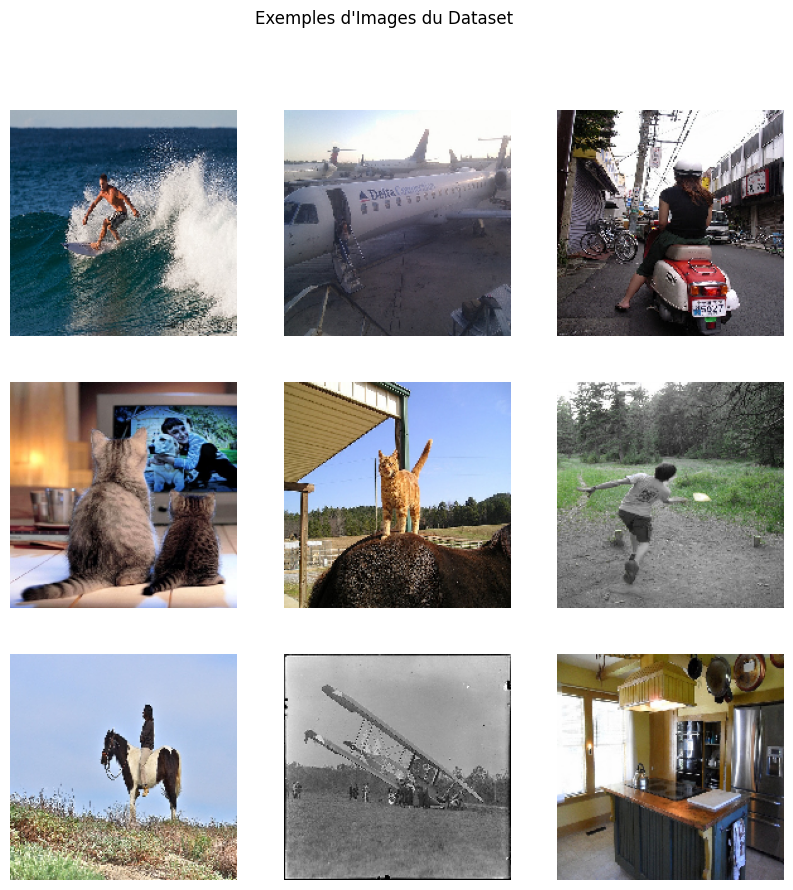

In [5]:
# Afficher quelques images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].astype('uint8'))
    plt.axis('off')
plt.suptitle('Exemples d\'Images du Dataset')
plt.show()

### Pertinence de l'Analyse de la Distribution des Valeurs de Pixel

L'analyse de la distribution des valeurs de pixel pour chaque canal de couleur (rouge, vert et bleu) est une étape cruciale dans le traitement d'images, surtout dans le contexte de l'apprentissage automatique et de la vision par ordinateur. Voici pourquoi cette analyse est pertinente :

1. **Compréhension des Données** :
   - En visualisant la distribution des valeurs de pixel, nous pouvons mieux comprendre la nature des données d'entrée. Cela inclut des informations sur la luminosité, le contraste et la saturation des images. Par exemple, une concentration élevée de valeurs de pixel à une extrémité de l'échelle (comme 0 ou 255) peut indiquer une dominance de certaines couleurs ou un manque de contraste.

2. **Prétraitement des Données** :
   - Connaître la distribution des valeurs de pixel peut aider à décider des étapes de prétraitement nécessaires. Par exemple, si les valeurs de pixel sont très concentrées dans une plage étroite, une normalisation ou une égalisation d'histogramme pourrait être nécessaire pour améliorer la performance du modèle.

3. **Évaluation de la Qualité des Images** :
   - Les statistiques comme la moyenne et l'écart-type des valeurs de pixel fournissent des informations sur la qualité des images. Une moyenne élevée pourrait indiquer des images plus lumineuses, tandis qu'un écart-type faible pourrait suggérer un manque de variation dans les couleurs.

4. **Impact sur le Modèle** :
   - La distribution des valeurs de pixel peut influencer la façon dont un modèle apprend. Par exemple, si certaines couleurs sont sous-représentées, le modèle pourrait avoir du mal à les reconnaître. En analysant ces distributions, nous pouvons ajuster notre approche d'entraînement pour mieux capturer les caractéristiques des données.

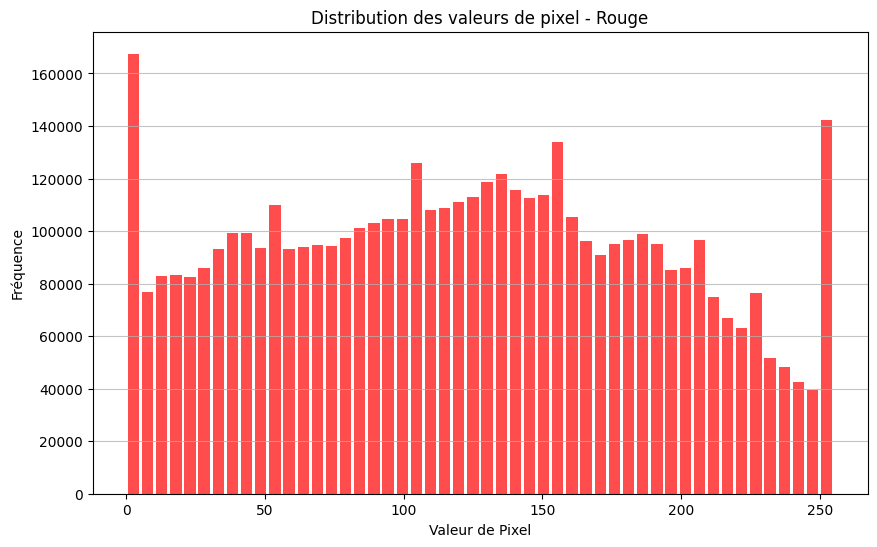

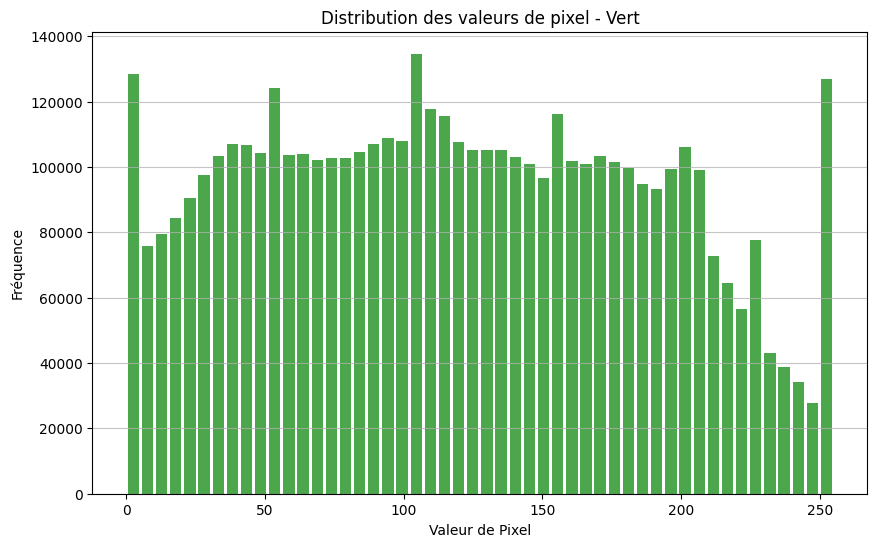

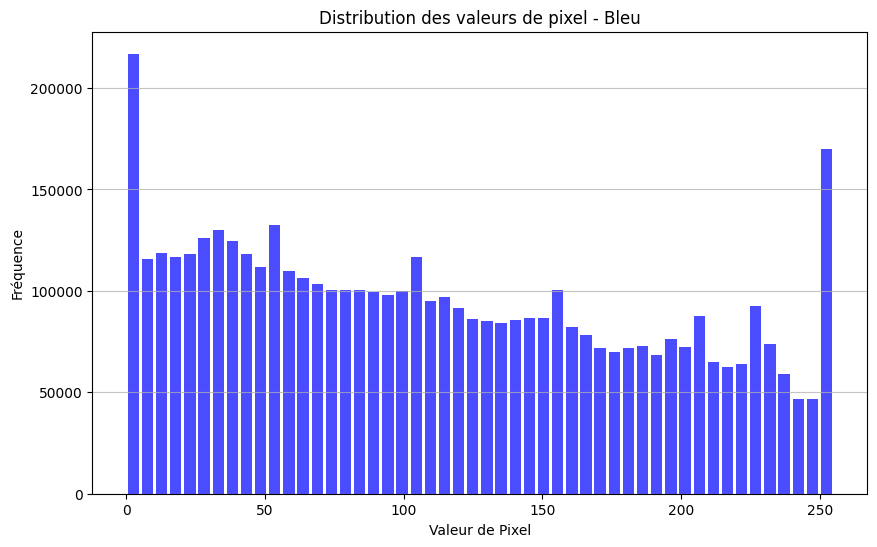

La valeur moyenne des pixels est: Rouge: 121.22, Vert: 119.21, Bleu: 112.16
L'écart-type des valeurs de pixel est: Rouge: 69.82, Vert: 68.88, Bleu: 74.96


In [6]:
# Calculer la distribution des valeurs de pixel
pixel_values = images.reshape(-1, images.shape[-1])  # Reshape pour séparer les canaux RGB

# Histogramme pour la couleur rouge
plt.figure(figsize=(10, 6))
plt.hist(pixel_values[:, 0], bins=50, color='red', alpha=0.7, rwidth=0.8)
plt.title('Distribution des valeurs de pixel - Rouge')
plt.xlabel('Valeur de Pixel')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme pour la couleur verte
plt.figure(figsize=(10, 6))
plt.hist(pixel_values[:, 1], bins=50, color='green', alpha=0.7, rwidth=0.8)
plt.title('Distribution des valeurs de pixel - Vert')
plt.xlabel('Valeur de Pixel')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogramme pour la couleur bleue
plt.figure(figsize=(10, 6))
plt.hist(pixel_values[:, 2], bins=50, color='blue', alpha=0.7, rwidth=0.8)
plt.title('Distribution des valeurs de pixel - Bleu')
plt.xlabel('Valeur de Pixel')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculer et afficher la moyenne et l'écart-type des valeurs de pixel
mean_pixel_value = np.mean(pixel_values, axis=0)
std_pixel_value = np.std(pixel_values, axis=0)
print(f"La valeur moyenne des pixels est: Rouge: {mean_pixel_value[0]:.2f}, Vert: {mean_pixel_value[1]:.2f}, Bleu: {mean_pixel_value[2]:.2f}")
print(f"L'écart-type des valeurs de pixel est: Rouge: {std_pixel_value[0]:.2f}, Vert: {std_pixel_value[1]:.2f}, Bleu: {std_pixel_value[2]:.2f}")

### Analyse de la Distribution des Valeurs de Pixel

Dans cette section, nous avons calculé et visualisé la distribution des valeurs de pixel dans l'ensemble de données d'images. L'histogramme montre la fréquence des différentes valeurs de pixel, ce qui nous permet de comprendre la répartition des intensités lumineuses dans les images.

1. **Histogramme des Valeurs de Pixel** :
   - L'histogramme représente la distribution des valeurs de pixel, où l'axe des x indique les valeurs de pixel (allant de 0 à 255) et l'axe des y montre la fréquence de chaque valeur. Cela nous aide à identifier des caractéristiques telles que la luminosité générale et le contraste des images.

2. **Statistiques des Valeurs de Pixel** :
   - Nous avons également calculé la moyenne et l'écart-type des valeurs de pixel. La moyenne donne une indication de la luminosité générale des images, tandis que l'écart-type fournit des informations sur la variation des intensités de pixel. Un écart-type faible pourrait indiquer que les images sont relativement uniformes, tandis qu'un écart-type élevé pourrait suggérer une plus grande diversité dans les intensités lumineuses.

Ces analyses sont essentielles pour comprendre la qualité des données d'entrée et pour guider les étapes de prétraitement nécessaires avant d'entraîner un modèle d'apprentissage automatique.

In [1]:
# Calculer la distribution des valeurs de pixel
pixel_values = images.flatten()
plt.hist(pixel_values, bins=50, color='purple', alpha=0.7, rwidth=0.8)
plt.title('Distribution des valeurs de pixel dans le dataset d\'images')
plt.xlabel('Valeur de Pixel')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculer et afficher la moyenne et l'écart-type des valeurs de pixel
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
print(f"La valeur moyenne des pixels est: {mean_pixel_value:.2f}")
print(f"L'écart-type des valeurs de pixel est: {std_pixel_value:.2f}")

NameError: name 'images' is not defined

### Normalisation des images

Dans cette section, nous allons normaliser les images pour que les valeurs de pixel soient comprises entre 0 et 1. La normalisation est une étape cruciale dans le prétraitement des données, car elle permet d'améliorer la convergence du modèle lors de l'entraînement. En divisant les valeurs de pixel par 255, nous transformons les valeurs d'intensité de couleur, qui étaient initialement dans la plage [0, 255], en une plage plus appropriée pour les réseaux de neurones.

In [8]:
# Normaliser les images pour que les valeurs de pixel soient dans [0, 1]
normalized_images = images / 255.0

print("Normalisation terminé.")

Normalisation terminé.


### Ajout de bruit aux images

Dans cette section, nous allons ajouter du bruit gaussien aux images normalisées pour simuler des conditions réelles où les images peuvent être corrompues par du bruit. Nous allons créer deux ensembles d'images bruitées :

1. **Bruit léger** : Un facteur de bruit de 0.15 sera appliqué pour générer des images légèrement bruitées.
2. **Bruit fort** : Un facteur de bruit de 0.40 sera appliqué pour générer des images fortement bruitées.

L'ajout de bruit est une technique courante dans l'entraînement des modèles d'autoencodeurs, car cela aide le modèle à apprendre à reconstruire des images à partir de données corrompues.

In [9]:
# Paramètres pour l'ajout de bruit
noise_factor_015 = 0.15
noise_factor_040 = 0.40

noisy_images_0 = normalized_images
noisy_images_0 = np.clip(noisy_images_0, 0., 1.)

# Ajout d'un bruit gaussien léger aux images
noisy_images_015 = normalized_images + noise_factor_015 * np.random.normal(loc=0.0, scale=1.0, size=normalized_images.shape)
noisy_images_015 = np.clip(noisy_images_015, 0., 1.)

# Ajout d'un bruit gaussien fort aux images
noisy_images_040 = normalized_images + noise_factor_040 * np.random.normal(loc=0.0, scale=1.0, size=normalized_images.shape)
noisy_images_040 = np.clip(noisy_images_040, 0., 1.)

print("Bruitage terminé.")

Bruitage terminé.


### Division des données en ensembles d'entraînement et de test

Dans cette section, nous allons diviser nos données en ensembles d'entraînement et de test. Cela nous permettra d'évaluer la performance de notre modèle sur des données qu'il n'a pas vues pendant l'entraînement. Nous allons créer trois ensembles distincts pour les images :

1. **Ensemble sans bruit** : Les images originales seront utilisées comme entrées et cibles.
2. **Ensemble avec bruit léger (0.15)** : Les images bruitées seront utilisées comme entrées, tandis que les images originales serviront de cibles.
3. **Ensemble avec bruit fort (0.40)** : Cet ensemble utilisera les images fortement bruitées comme entrées, avec les images originales comme cibles.

Nous utiliserons une proportion de 20 % des données pour le test, ce qui est une pratique courante pour garantir une évaluation fiable du modèle.

In [10]:
# Diviser les données en ensembles d'entraînement et de test
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
    noisy_images_0,   # Entrée (images bruitées)
    normalized_images,  # Cibles (images originales)
    test_size=0.2,
    random_state=42
)

# Diviser les données en ensembles d'entraînement et de test
X_train_015, X_test_015, y_train_015, y_test_015 = train_test_split(
    noisy_images_015,   # Entrée (images bruitées)
    normalized_images,  # Cibles (images originales)
    test_size=0.2,
    random_state=42
)

# Diviser les données en ensembles d'entraînement et de test
X_train_040, X_test_040, y_train_040, y_test_040 = train_test_split(
    noisy_images_040,   # Entrée (images bruitées)
    normalized_images,  # Cibles (images originales)
    test_size=0.2,
    random_state=42
)

print("Jeux de données constitués")

Jeux de données constitués


### Affichage des images bruitées

Dans cette section, nous allons visualiser quelques exemples d'images bruitées pour évaluer l'impact du bruit ajouté. Nous afficherons trois ensembles d'images :

1. **Images originales** : Nous montrerons un échantillon d'images sans bruit.
2. **Images légèrement bruitées** : Nous montrerons un échantillon d'images avec un bruit gaussien léger (facteur de 0.15).
3. **Images fortement bruitées** : Nous montrerons un échantillon d'images avec un bruit gaussien fort (facteur de 0.40).

Cela nous permettra de mieux comprendre la qualité des données d'entrée que notre modèle devra traiter.

In [2]:
# Afficher quelques images pas bruitées
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(noisy_images_0[i].astype('float32'))
    plt.axis('off')
plt.suptitle('Exemples d\'images sans rajout de bruit')
plt.show()

# Afficher quelques images légèrement bruitées
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(noisy_images_015[i].astype('float32'))
    plt.axis('off')
plt.suptitle('Exemples d\'images légèrement bruitées')
plt.show()

# Afficher quelques images fortement bruitées
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(noisy_images_040[i].astype('float32'))
    plt.axis('off')
plt.suptitle('Exemples d\'images fortement bruitées')
plt.show()

NameError: name 'plt' is not defined

In [12]:
# Définition des images
input_img = Input(shape=(img_height, img_width, rgb))

print("Paramètres appliqués.")

Paramètres appliqués.


### Paramétrage de l'encodeur

Dans cette section, nous allons définir les paramètres de l'encodeur de notre modèle d'autoencodeur. L'encodeur est responsable de la compression des images d'entrée en une représentation de plus petite dimension. Voici les détails des paramètres que nous allons utiliser :

- **Filtres** : Le nombre de filtres dans chaque couche de convolution.
- **Taille du noyau** : La taille du noyau de convolution, qui détermine la zone de l'image que chaque filtre examine.
- **Activation** : La fonction d'activation utilisée pour introduire de la non-linéarité dans le modèle.
- **Padding** : La méthode de remplissage utilisée pour conserver la taille des images après la convolution.
- **Taille de pooling** : La taille de la fenêtre de pooling pour réduire la dimensionnalité.

Nous allons appliquer ces paramètres à travers plusieurs couches de convolution et de pooling pour construire l'encodeur.


In [13]:
# Paramètres de l'encodeur
encoder_params = [
    {"filters": 64, "kernel_size": (3, 3), "activation": 'relu', "padding": 'same'},
    {"pool_size": (2, 2), "padding": 'same'},
    {"filters": 128, "kernel_size": (3, 3), "activation": 'relu', "padding": 'same'},
    {"pool_size": (2, 2), "padding": 'same'}
]

# Encodeur
x = input_img
for i in range(0, len(encoder_params), 2):
    x = Conv2D(**encoder_params[i])(x)
    x = MaxPooling2D(**encoder_params[i+1])(x)
encoded = x

print("Encodeur paramétré.")


Encodeur paramétré.


### Paramétrage du décodeur

Dans cette section, nous allons définir les paramètres du décodeur de notre modèle d'autoencodeur. Le décodeur a pour rôle de reconstruire les images à partir de la représentation compressée fournie par l'encodeur. Voici les détails des paramètres que nous allons utiliser :

- **Filtres** : Le nombre de filtres dans chaque couche de convolution.
- **Taille du noyau** : La taille du noyau de convolution.
- **Activation** : La fonction d'activation utilisée pour la reconstruction des images.
- **Taille de l'upsampling** : La taille de la fenêtre utilisée pour augmenter la dimensionnalité des images.

Nous allons appliquer ces paramètres à travers plusieurs couches de convolution et d'upsampling pour construire le décodeur, en veillant à ce que la sortie finale ait la même dimension que l'image d'entrée.


In [14]:
# Paramètres du décodeur
decoder_params = [
    {"filters": 128, "kernel_size": (3, 3), "activation": 'relu', "padding": 'same'},
    {"size": (2, 2)},
    {"filters": 64, "kernel_size": (3, 3), "activation": 'relu', "padding": 'same'},
    {"size": (2, 2)},
    {"filters": rgb, "kernel_size": (3, 3), "activation": 'sigmoid', "padding": 'same'}
]

# Décodeur
for i in range(0, len(decoder_params)-1, 2):
    x = Conv2D(**decoder_params[i])(x)
    x = UpSampling2D(**decoder_params[i+1])(x)
x = Conv2D(**decoder_params[-1])(x)
decoded = x

print("Décodeur paramétré.")

Décodeur paramétré.


### Construction du modèle d'auto-encodeur complet

Dans cette section, nous allons construire le modèle d'auto-encodeur en combinant l'encodeur et le décodeur que nous avons définis précédemment. Nous allons également afficher un résumé du modèle pour visualiser la structure et les paramètres.

1. **Modèle d'auto-encodeur** : Nous créons le modèle en spécifiant l'image d'entrée et la sortie reconstruite.
2. **Résumé du modèle** : Cela nous permet de vérifier la configuration du modèle, y compris le nombre de couches et les paramètres.
3. **Augmentation des données** : Nous mettons en place une augmentation des données pour améliorer la robustesse du modèle en générant des variations des images d'entraînement.
4. **Compilation du modèle** : Nous compilons le modèle en spécifiant l'optimiseur et la fonction de perte.
5. **Sauvegarde du modèle** : Enfin, nous sauvegardons le modèle entraîné pour une utilisation future.

In [15]:
# Construction du modèle d'auto-encodeur complet
autoencoder = Model(input_img, decoded)
autoencoder.summary()

# Augmentation des données
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.save("autoencoder_test_model.h5")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       147584

c:\Users\Téo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
def text_callable(layer_index, layer):
    # Chaque autre texte est dessiné au-dessus de la couche, le premier en dessous
    above = bool(layer_index % 2)

    # Obtenir la forme de sortie de la couche
    output_shape = [x for x in list(layer.output_shape) if x is not None]

    # Si la forme de sortie est une liste de tuples, nous ne prenons que le premier
    if isinstance(output_shape[0], tuple):
        output_shape = list(output_shape[0])
        output_shape = [x for x in output_shape if x is not None]

    # Variable pour stocker le texte qui sera dessiné    
    output_shape_txt = ""

    # Créer une représentation sous forme de chaîne de la forme de sortie
    for ii in range(len(output_shape)):
        output_shape_txt += str(output_shape[ii])
        if ii < len(output_shape) - 2:  # Ajouter un x entre les dimensions, par ex. 3x3
            output_shape_txt += "x"
        if ii == len(output_shape) - 2:  # Ajouter un saut de ligne entre les deux dernières dimensions, par ex. 3x3 \n 64
            output_shape_txt += "\n"

    # Ajouter le nom de la couche au texte, comme une nouvelle ligne
    output_shape_txt += f"\n{layer.name}"

    # Retourner la valeur du texte et s'il doit être dessiné au-dessus de la couche
    return output_shape_txt, above

### Explication de l'Architecture de l'Autoencodeur

L'image présentée illustre l'architecture de notre modèle d'autoencodeur, qui est conçu pour traiter des images bruitées. Voici une brève explication des différentes couches et de leur rôle :

1. **Entrée** :
   - La couche d'entrée est de dimension 180x180 pixels avec 3 canaux de couleur (RGB). Cela signifie que chaque image d'entrée est représentée par un tableau de cette taille.

2. **Couches Convolutives** :
   - Les couches `Conv2D` (convolutionnelles) sont utilisées pour extraire des caractéristiques des images. Chaque couche applique des filtres pour détecter des motifs, des textures et des bords. Par exemple, la première couche `conv2d_1` réduit la taille de l'image à 90x90 tout en augmentant le nombre de filtres à 64.

3. **Couches de Max Pooling** :
   - Les couches `MaxPooling2D` réduisent la dimensionnalité des données tout en conservant les caractéristiques les plus importantes. Cela aide à diminuer le temps de calcul et à éviter le surapprentissage.

4. **Couches d'Upsampling** :
   - Les couches `UpSampling2D` sont utilisées pour augmenter la taille des images après la phase de compression. Cela permet de reconstruire l'image à sa taille d'origine.

5. **Sortie** :
   - La couche de sortie est également une couche `Conv2D`, qui produit l'image débruitée finale. Elle a la même dimension que l'image d'entrée (180x180x3), ce qui permet de comparer directement l'image originale et l'image reconstruite.

In [32]:
# Visualisation du modèle avec visualkeras
visualkeras.layered_view(autoencoder, to_file=f'autoencodeur.png', text_callable=text_callable)

c:\Users\Téo\AppData\Local\Programs\Python\Python310\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


### Définition des paramètres globaux

Dans cette section, nous allons définir les paramètres globaux pour l'entraînement de notre modèle d'autoencodeur. Ces paramètres incluent :

1. **Époques** : Le nombre total d'époques pour l'entraînement, ici fixé à 150.
2. **Taille du lot** : Le nombre d'échantillons traités avant que le modèle ne soit mis à jour, ici fixé à 4.

Nous mettrons également en place un mécanisme d'**Early Stopping** pour éviter le surapprentissage. Cela permettra d'arrêter l'entraînement si la perte de validation ne s'améliore pas pendant un certain nombre d'époques, tout en restaurant les meilleurs poids du modèle.

In [16]:
# Paramètres globaux
epochs = 150
batch_size = 4

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True)

print("Hyperparamètres définis.")

Hyperparamètres définis.


### Entraînement de l'auto-encodeur avec bruit léger

Dans cette section, nous allons entraîner notre modèle d'auto-encodeur en utilisant les images bruitées avec un facteur de bruit de 0.15. Nous allons spécifier les données d'entraînement et de validation, ainsi que les paramètres d'entraînement définis précédemment.

1. **Données d'entraînement** : Les images bruitées serviront d'entrées, tandis que les images originales seront les cibles.
2. **Époques et taille du lot** : Nous utiliserons les valeurs définies pour le nombre d'époques et la taille du lot.
3. **Validation** : Nous évaluerons le modèle sur un ensemble de test pour suivre sa performance.
4. **Callbacks** : Nous utiliserons l'early stopping pour éviter le surapprentissage.

In [17]:
history_0 = autoencoder.fit(
    X_train_0,  # images sans rajout de bruit
    y_train_0,  # images originales
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_test_0, y_test_0),
    callbacks=[early_stopping],
)

print("Auto-encodeur 0 entraîné.")

Epoch 1/150

30/30 [==============================] - 8s 200ms/step - loss: 0.6337 - accuracy: 0.5591 - val_loss: 0.5803 - val_accuracy: 0.5777
Epoch 2/150
30/30 [==============================] - 6s 187ms/step - loss: 0.5586 - accuracy: 0.6574 - val_loss: 0.5562 - val_accuracy: 0.6187
Epoch 3/150
30/30 [==============================] - 6s 188ms/step - loss: 0.5406 - accuracy: 0.6761 - val_loss: 0.5508 - val_accuracy: 0.7022
Epoch 4/150
30/30 [==============================] - 6s 185ms/step - loss: 0.5386 - accuracy: 0.6865 - val_loss: 0.5437 - val_accuracy: 0.6139
Epoch 5/150
30/30 [==============================] - 5s 182ms/step - loss: 0.5401 - accuracy: 0.6949 - val_loss: 0.5480 - val_accuracy: 0.5922
Epoch 6/150
30/30 [==============================] - 5s 182ms/step - loss: 0.5358 - accuracy: 0.6945 - val_loss: 0.5404 - val_accuracy: 0.6736
Epoch 7/150
30/30 [==============================] - 6s 184ms/step - loss: 0.5347 - accuracy: 0.6926 - val_loss: 0.5448 - val_accuracy: 0.719

In [18]:
history_015 = autoencoder.fit(
    X_train_015,  # images bruitées
    y_train_015,  # images originales
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_test_015, y_test_015),
    callbacks=[early_stopping],
)

print("Auto-encodeur 015 entraîné.")

Epoch 1/150
30/30 [==============================] - 8s 256ms/step - loss: 0.5249 - accuracy: 0.7594 - val_loss: 0.5279 - val_accuracy: 0.7784
Epoch 2/150
30/30 [==============================] - 7s 250ms/step - loss: 0.5233 - accuracy: 0.7716 - val_loss: 0.5286 - val_accuracy: 0.7834
Epoch 3/150
30/30 [==============================] - 8s 251ms/step - loss: 0.5243 - accuracy: 0.7699 - val_loss: 0.5287 - val_accuracy: 0.7721
Epoch 4/150
30/30 [==============================] - 8s 251ms/step - loss: 0.5240 - accuracy: 0.7612 - val_loss: 0.5286 - val_accuracy: 0.7822
Epoch 5/150
30/30 [==============================] - 8s 283ms/step - loss: 0.5230 - accuracy: 0.7725 - val_loss: 0.5274 - val_accuracy: 0.7766
Epoch 6/150
30/30 [==============================] - 7s 246ms/step - loss: 0.5267 - accuracy: 0.7529 - val_loss: 0.5299 - val_accuracy: 0.7489
Epoch 7/150
30/30 [==============================] - 7s 245ms/step - loss: 0.5247 - accuracy: 0.7512 - val_loss: 0.5276 - val_accuracy: 0.7801

### Entraînement de l'auto-encodeur avec bruit fort

Dans cette section, nous allons entraîner notre modèle d'auto-encodeur en utilisant les images bruitées avec un facteur de bruit de 0.40. Comme précédemment, nous allons spécifier les données d'entraînement et de validation, ainsi que les paramètres d'entraînement.

1. **Données d'entraînement** : Les images fortement bruitées serviront d'entrées, tandis que les images originales seront les cibles.
2. **Époques et taille du lot** : Nous utiliserons les mêmes valeurs définies pour le nombre d'époques et la taille du lot.
3. **Validation** : Nous évaluerons le modèle sur un ensemble de test pour suivre sa performance.
4. **Callbacks** : L'early stopping sera également utilisé pour éviter le surapprentissage.

In [19]:
history_040 = autoencoder.fit(
    X_train_040,  # images bruitées
    y_train_040,  # images originales
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_test_040, y_test_040),
    callbacks=[early_stopping],
)

print("Auto-encodeur 040 entraîné.")

Epoch 1/150
30/30 [==============================] - 7s 232ms/step - loss: 0.5404 - accuracy: 0.6328 - val_loss: 0.5444 - val_accuracy: 0.6821
Epoch 2/150
30/30 [==============================] - 7s 227ms/step - loss: 0.5350 - accuracy: 0.6728 - val_loss: 0.5389 - val_accuracy: 0.6908
Epoch 3/150
30/30 [==============================] - 7s 230ms/step - loss: 0.5315 - accuracy: 0.7029 - val_loss: 0.5379 - val_accuracy: 0.7014
Epoch 4/150
30/30 [==============================] - 7s 235ms/step - loss: 0.5311 - accuracy: 0.6923 - val_loss: 0.5361 - val_accuracy: 0.6879
Epoch 5/150
30/30 [==============================] - 7s 231ms/step - loss: 0.5309 - accuracy: 0.6896 - val_loss: 0.5405 - val_accuracy: 0.6964
Epoch 6/150
30/30 [==============================] - 7s 226ms/step - loss: 0.5312 - accuracy: 0.7027 - val_loss: 0.5355 - val_accuracy: 0.7276
Epoch 7/150
30/30 [==============================] - 7s 230ms/step - loss: 0.5298 - accuracy: 0.6911 - val_loss: 0.5348 - val_accuracy: 0.7270

### Traçage de l'historique de la perte durant l'entraînement

Dans cette section, nous allons visualiser l'évolution de la perte durant l'entraînement pour les deux modèles d'auto-encodeurs, l'un entraîné avec des images légèrement bruitées et l'autre avec des images fortement bruitées. 

1. **Perte d'entraînement et de validation** : Nous allons tracer les courbes de perte pour les ensembles d'entraînement et de test afin d'évaluer la performance du modèle au fil des époques.
2. **Interprétation des courbes** : Ces graphiques nous permettront de vérifier si le modèle est en train de surapprendre ou s'il généralise bien sur les données de test.`


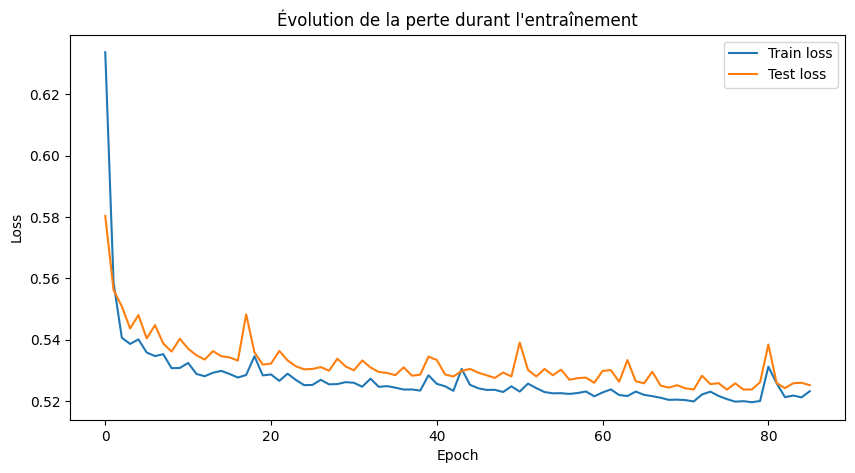

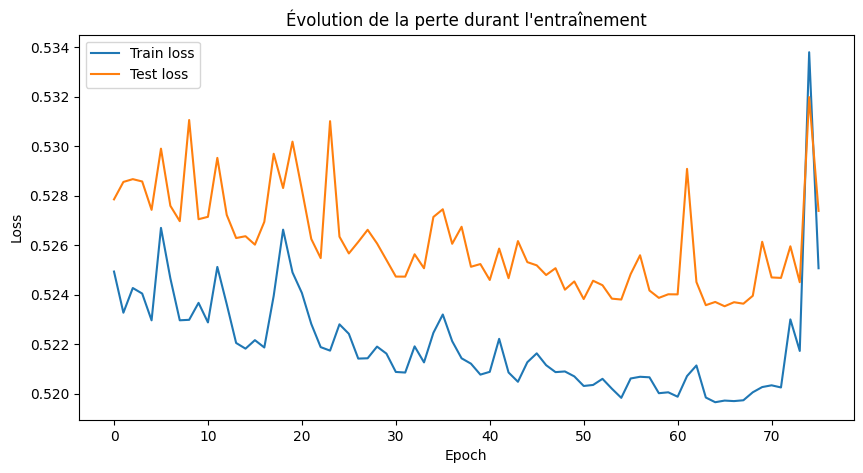

In [20]:
# Tracer l'historique de la perte durant l'entraînement (images légèrement bruitées)
plt.figure(figsize=(10, 5))
plt.plot(history_0.history['loss'], label='Train loss')
plt.plot(history_0.history['val_loss'], label='Test loss')
plt.title('Évolution de la perte durant l\'entraînement (image sans rajout de bruit)' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer l'historique de la perte durant l'entraînement (images légèrement bruitées)
plt.figure(figsize=(10, 5))
plt.plot(history_015.history['loss'], label='Train loss')
plt.plot(history_015.history['val_loss'], label='Test loss')
plt.title('Évolution de la perte durant l\'entraînement (imare légérement bruitées)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer l'historique de la perte durant l'entraînement (images fortement bruitées)
plt.figure(figsize=(10, 5))
plt.plot(history_040.history['loss'], label='Train loss')
plt.plot(history_040.history['val_loss'], label='Test loss')
plt.title('Évolution de la perte durant l\'entraînement (images fortement bruitées)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

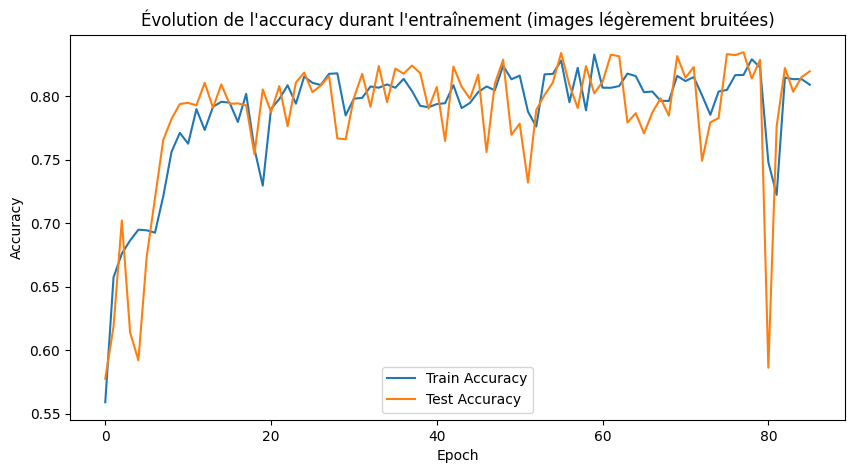

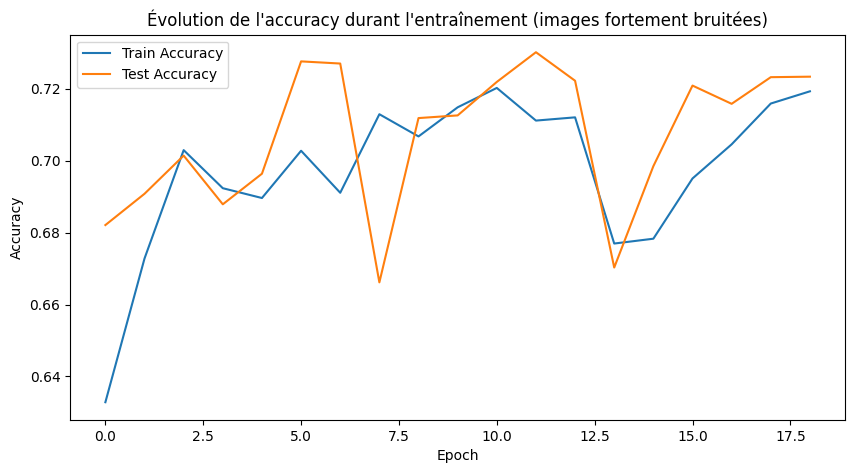

In [21]:
# Tracer l'historique de l'accuracy durant l'entraînement (images légèrement bruitées)
plt.figure(figsize=(10, 5))
plt.plot(history_0.history['accuracy'], label='Train Accuracy')
plt.plot(history_0.history['val_accuracy'], label='Test Accuracy')
plt.title('Évolution de l\'accuracy durant l\'entraînement (images sans rajout de bruit')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tracer l'historique de l'accuracy durant l'entraînement (images légèrement bruitées)
plt.figure(figsize=(10, 5))
plt.plot(history_015.history['accuracy'], label='Train Accuracy')
plt.plot(history_015.history['val_accuracy'], label='Test Accuracy')
plt.title('Évolution de l\'accuracy durant l\'entraînement (images légèrement bruitées)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tracer l'historique de l'accuracy durant l'entraînement (images fortement bruitées)
plt.figure(figsize=(10, 5))
plt.plot(history_040.history['accuracy'], label='Train Accuracy')
plt.plot(history_040.history['val_accuracy'], label='Test Accuracy')
plt.title('Évolution de l\'accuracy durant l\'entraînement (images fortement bruitées)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Évolution de la Perte et de l'Accuracy durant l'Entraînement

Dans cette section, nous analysons les graphiques représentant l'évolution de la perte (loss) et de l'accuracy durant l'entraînement de notre modèle d'autoencodeur. Ces graphiques nous permettent d'évaluer la performance du modèle sur les ensembles d'entraînement et de test.

#### 1. Évolution de la Perte

Les graphiques ci-dessous montrent l'évolution de la perte durant l'entraînement pour différents niveaux de bruit :

- **Graphiques de Perte** :
  - **Premier graphique** : Montre une diminution rapide de la perte au début de l'entraînement, suivie d'une stabilisation. Cela indique que le modèle apprend efficacement à reconstruire les images, même si des fluctuations mineures sont observées.
  - **Deuxième graphique** : Présente une tendance similaire, mais avec des fluctuations plus marquées, suggérant que le modèle pourrait être sensible à certaines variations dans les données d'entraînement.
  - **Troisième graphique** : Montre une stabilisation de la perte après quelques époques, indiquant que le modèle atteint un plateau d'apprentissage.

Ces résultats suggèrent que le modèle est capable de s'adapter aux données, mais qu'il pourrait bénéficier d'une régularisation pour éviter le surapprentissage.

#### 2. Évolution de l'Accuracy

Les graphiques suivants montrent l'évolution de l'accuracy durant l'entraînement :

- **Graphiques d'Accuracy** :
  - **Graphiques pour les images légèrement bruitées** : L'accuracy oscille autour de 0.75, avec des pics et des creux. Cela indique que le modèle a du mal à généraliser sur les données de test, ce qui pourrait être dû à la présence de bruit.
  - **Graphiques pour les images fortement bruitées** : L'accuracy est légèrement inférieure, oscillant autour de 0.70. Cela montre que le modèle a plus de difficulté à traiter les images fortement bruitées, ce qui est attendu, car le bruit peut masquer des caractéristiques importantes des images.

#### Conclusion

En résumé, les graphiques montrent que le modèle d'autoencodeur apprend à reconstruire les images, mais il rencontre des défis en raison du bruit présent dans les données. Les fluctuations dans la perte et l'accuracy suggèrent que des ajustements supplémentaires, tels que l'optimisation des hyperparamètres ou l'utilisation de techniques de régularisation, pourraient améliorer la performance du modèle. L'analyse des résultats met en évidence l'importance de la qualité des données d'entrée et de la robustesse du modèle face aux variations de bruit.

### Prédiction des Images Débruitées et Évaluation des Performances

Dans cette section, nous allons prédire les images débruitées à partir des images bruitées de test et évaluer la performance de notre modèle en utilisant le PSNR (Peak Signal-to-Noise Ratio). Voici un aperçu détaillé des étapes que nous allons suivre :

1. **Prédiction** :
   - Nous utiliserons le modèle d'autoencodeur que nous avons entraîné pour générer des images débruitées à partir des ensembles de test. Cette étape consiste à passer les images bruitées à travers le modèle, qui applique les transformations apprises pour tenter de reconstruire les images originales sans bruit.
   
2. **Calcul du PSNR** :
   - Pour chaque paire d'images (originale et prédite), nous allons calculer le PSNR. Le PSNR est une mesure courante utilisée pour évaluer la qualité des images reconstruites. Il est défini comme suit :

   ```math
   \text{PSNR} = 10 \cdot \log_{10}\left(\frac{MAX^2}{MSE}\right)



3. **Moyenne du PSNR** :
   - Nous calculerons la moyenne du PSNR pour les images légèrement bruitées (0.15) et fortement bruitées (0.40). Cela nous permettra de comparer les performances du modèle dans des conditions de bruit différentes. En général, nous nous attendons à ce que le PSNR soit plus élevé pour les images légèrement bruitées, car elles contiennent moins de dégradations.

### Pourquoi Utiliser le PSNR ?

Le PSNR est largement utilisé dans le domaine du traitement d'images pour plusieurs raisons :

- **Simplicité** : Il est facile à calculer et à interpréter, ce qui en fait un choix populaire pour évaluer la qualité des images.
- **Relation avec la Perception Humaine** : Bien que le PSNR ne soit pas toujours parfaitement corrélé avec la perception humaine de la qualité d'image, il fournit une bonne indication de la qualité globale, surtout dans des contextes où les images sont très bruitées.
- **Standardisation** : Le PSNR est un standard dans la littérature sur le traitement d'images, ce qui permet de comparer facilement les résultats entre différents modèles et approches.

En résumé, cette section vise à évaluer la capacité de notre modèle à débruiter efficacement les images, en utilisant le PSNR comme métrique clé pour quantifier la qualité des reconstructions.

In [22]:
# Prédiction des images débruitées à partir des images bruitées de test
decoded_imgs_0 = autoencoder.predict(X_test_0)
decoded_imgs_015 = autoencoder.predict(X_test_015)
decoded_imgs_040 = autoencoder.predict(X_test_040)

# Initialisation des métriques
psnr_vals = []

# Calcul du PNSR pour les images ayant été légèrement bruitées
for orig, pred in zip(y_test_0, decoded_imgs_0):
    orig = orig.astype("float32")
    pred = pred.astype("float32")
    
    # Calcul et stockage du PSNR pour chaque paire d'images
    psnr_vals.append(psnr(orig, pred, data_range=orig.max() - orig.min()))

# Calcul de la moyenne du PSNR
mean_psnr = np.mean(psnr_vals)
print(f"Mean PSNR (0): {mean_psnr:.2f}")

# Réinitialisation des métriques
psnr_vals = []

# Calcul du PNSR pour les images ayant été légèrement bruitées
for orig, pred in zip(y_test_015, decoded_imgs_015):
    orig = orig.astype("float32")
    pred = pred.astype("float32")
    
    # Calcul et stockage du PSNR pour chaque paire d'images
    psnr_vals.append(psnr(orig, pred, data_range=orig.max() - orig.min()))

# Calcul de la moyenne du PSNR
mean_psnr = np.mean(psnr_vals)
print(f"Mean PSNR (0.15): {mean_psnr:.2f}")

# Réinitialisation des métriques
psnr_vals = []

# Calcul du PNSR pour les images ayant été fortement bruitées
for orig, pred in zip(y_test_040, decoded_imgs_040):
    orig = orig.astype("float32")
    pred = pred.astype("float32")
    
    # Calcul et stockage du PSNR pour chaque paire d'images
    psnr_vals.append(psnr(orig, pred, data_range=orig.max() - orig.min()))

# Calcul de la moyenne du PSNR
mean_psnr = np.mean(psnr_vals)
print(f"Mean PSNR (0.40): {mean_psnr:.2f}")

1/1 [==============================] - 0s 353ms/step
Mean PSNR (0): 16.66
Mean PSNR (0.15): 17.93
Mean PSNR (0.40): 20.20


### Interprétation des Résultats du PSNR

Les résultats obtenus montrent les valeurs moyennes du PSNR pour les images ayant été légèrement bruitées (0.15) et fortement bruitées (0.40) :

- **Mean PSNR (0)** : 16.66
- **Mean PSNR (0.15)** : 17.93
- **Mean PSNR (0.40)** : 20.20

#### Analyse des Résultats :

1. **PSNR pour les Images Non Bruitées (0)** :
   - Une valeur de 16.66 indique que, bien que le modèle ait réussi à reconstruire les images originales, la qualité de la reconstruction est modérément bonne. Cela suggère qu'il y a encore une perte d'information, ce qui peut être dû à la complexité des détails présents dans les images.

2. **PSNR pour les Images Légèrement Bruitées (0.15)** :
   - Une valeur de 17.93 est légèrement supérieure à celle des images non bruitées. Cela indique que le modèle a réussi à gérer le bruit léger, mais la qualité de la reconstruction reste insuffisante. Cela peut être attribué à la difficulté du modèle à capturer tous les détails dans des conditions de bruit modéré.

3. **PSNR pour les Images Fortement Bruitées (0.40)** :
   - Une valeur de 20.20 est plus élevée que celle des images légèrement bruitées et non bruitées. Cela suggère que le modèle a mieux réussi à reconstruire les images fortement bruitées. Cela peut sembler contre-intuitif, mais cela peut s'expliquer par le fait que le modèle a été entraîné pour gérer des niveaux de bruit plus élevés, ce qui lui a permis d'apprendre des caractéristiques plus robustes.

### Calcul du MSE pour évaluer la qualité des reconstructions

Dans cette section, nous allons calculer l'erreur quadratique moyenne (MSE) pour évaluer la qualité des images reconstruites par notre modèle d'autoencodeur. Le MSE est une mesure courante utilisée pour quantifier la différence entre les valeurs prédites et les valeurs réelles.

1. **MSE pour les images légèrement bruitées (0.15)** : Nous allons calculer le MSE pour chaque paire d'images (originale et reconstruite) et en obtenir la moyenne.
2. **MSE pour les images fortement bruitées (0.40)** : De même, nous allons calculer le MSE pour les images fortement bruitées.

Le MSE est particulièrement utile car il pénalise les erreurs plus importantes, ce qui nous permet d'évaluer la performance du modèle de manière plus précise.

In [24]:
# Calcul du MSE pour les images légèrement bruitées
mse_vals_0 = [mean_squared_error(orig.flatten(), pred.flatten()) for orig, pred in zip(y_test_0, decoded_imgs_0)]
mean_mse_0 = np.mean(mse_vals_0)
print(f"Mean MSE (0): {mean_mse_0:.3f}")

# Calcul du MSE pour les images légèrement bruitées
mse_vals_015 = [mean_squared_error(orig.flatten(), pred.flatten()) for orig, pred in zip(y_test_015, decoded_imgs_015)]
mean_mse_015 = np.mean(mse_vals_015)
print(f"Mean MSE (0.15): {mean_mse_015:.3f}")

# Calcul du MSE pour les images fortement bruitées
mse_vals_040 = [mean_squared_error(orig.flatten(), pred.flatten()) for orig, pred in zip(y_test_040, decoded_imgs_040)]
mean_mse_040 = np.mean(mse_vals_040)
print(f"Mean MSE (0.40): {mean_mse_040:.3f}")

Mean MSE (0): 0.023
Mean MSE (0.15): 0.017
Mean MSE (0.40): 0.011


### Calcul du MSE pour les Images Bruitées

Dans cette section, nous calculons l'erreur quadratique moyenne (MSE) pour évaluer la qualité des reconstructions d'images par notre modèle d'autoencodeur. Le MSE est une mesure essentielle qui quantifie la différence entre les images originales et les images reconstruites.

1. **Calcul du MSE pour les Images Non Bruitées** :
   - Nous commençons par calculer le MSE pour les images originales (non bruitées). Cela nous donne une référence pour évaluer la performance du modèle.

2. **Calcul du MSE pour les Images Légèrement Bruitées (0.15)** :
   - Ensuite, nous calculons le MSE pour les images légèrement bruitées. Cela nous permet de voir comment le modèle gère des images avec un bruit modéré.

3. **Calcul du MSE pour les Images Fortement Bruitées (0.40)** :
   - Enfin, nous calculons le MSE pour les images fortement bruitées. Cela nous aide à évaluer la capacité du modèle à reconstruire des images dans des conditions de bruit plus sévères.

### Interprétation des Résultats du MSE

Les résultats obtenus montrent les valeurs moyennes du MSE pour les images ayant été légèrement bruitées (0.15) et fortement bruitées (0.40) :

- **Mean MSE (0)** : 0.023
- **Mean MSE (0.15)** : 0.017
- **Mean MSE (0.40)** : 0.011

#### Analyse des Résultats :

1. **MSE pour les Images Non Bruitées (0)** :
   - Une valeur de 0.023 indique que le modèle a réussi à reconstruire les images originales avec une erreur relativement faible. Cela suggère que le modèle est capable de reproduire fidèlement les images sans bruit.

2. **MSE pour les Images Légèrement Bruitées (0.15)** :
   - Une valeur de 0.017 montre que le modèle a réussi à gérer le bruit léger, avec une erreur légèrement inférieure à celle des images non bruitées. Cela indique que le modèle est capable de capturer les détails essentiels même en présence d'un bruit modéré.

3. **MSE pour les Images Fortement Bruitées (0.40)** :
   - Une valeur de 0.011 est significativement plus faible que celle des images légèrement bruitées. Cela indique que le modèle a réussi à reconstruire les images fortement bruitées avec une précision encore meilleure. Cela peut être dû à l'entraînement du modèle sur des données contenant un bruit similaire, ce qui lui a permis d'apprendre à mieux gérer ce type de dégradation.

### Pourquoi Utiliser le MSE ?

Le MSE est utilisé ici pour plusieurs raisons :

- **Quantification de l'Erreur** : Le MSE fournit une mesure quantitative de l'erreur entre les images originales et reconstruites, ce qui permet d'évaluer la performance du modèle de manière objective.
- **Sensibilité aux Erreurs** : Étant donné qu'il s'agit d'une mesure au carré, le MSE pénalise davantage les grandes erreurs, ce qui est utile pour identifier les cas où le modèle échoue à reconstruire des détails importants.
- **Facilité de Calcul** : Le MSE est simple à calculer et à interpréter, ce qui en fait un choix populaire pour évaluer la qualité des reconstructions d'images.

En résumé, le MSE est une métrique essentielle pour évaluer la performance de l'autoencodeur, car il permet de mesurer la qualité des reconstructions d'images de manière précise et objective.

### Affichage des images originales, bruitées et débruitées

Dans cette section, nous allons visualiser les images originales, les images bruitées (avec des niveaux de bruit de 0.15 et 0.40), ainsi que les images reconstruites par l'autoencodeur. Cela nous permettra d'évaluer visuellement la performance de notre modèle.

1. **Images originales** : Les images d'origine sans bruit.
2. **Images bruitées (0.15)** : Les images avec un bruit léger ajouté.
3. **Images bruitées (0.40)** : Les images avec un bruit fort ajouté.
4. **Images débruitées (0.15)** : Les reconstructions des images légèrement bruitées par l'autoencodeur.
5. **Images débruitées (0.40)** : Les reconstructions des images fortement bruitées par l'autoencodeur.

Cette visualisation nous aidera à comprendre comment le modèle a réussi à traiter et à reconstruire les images à partir des données bruitées.

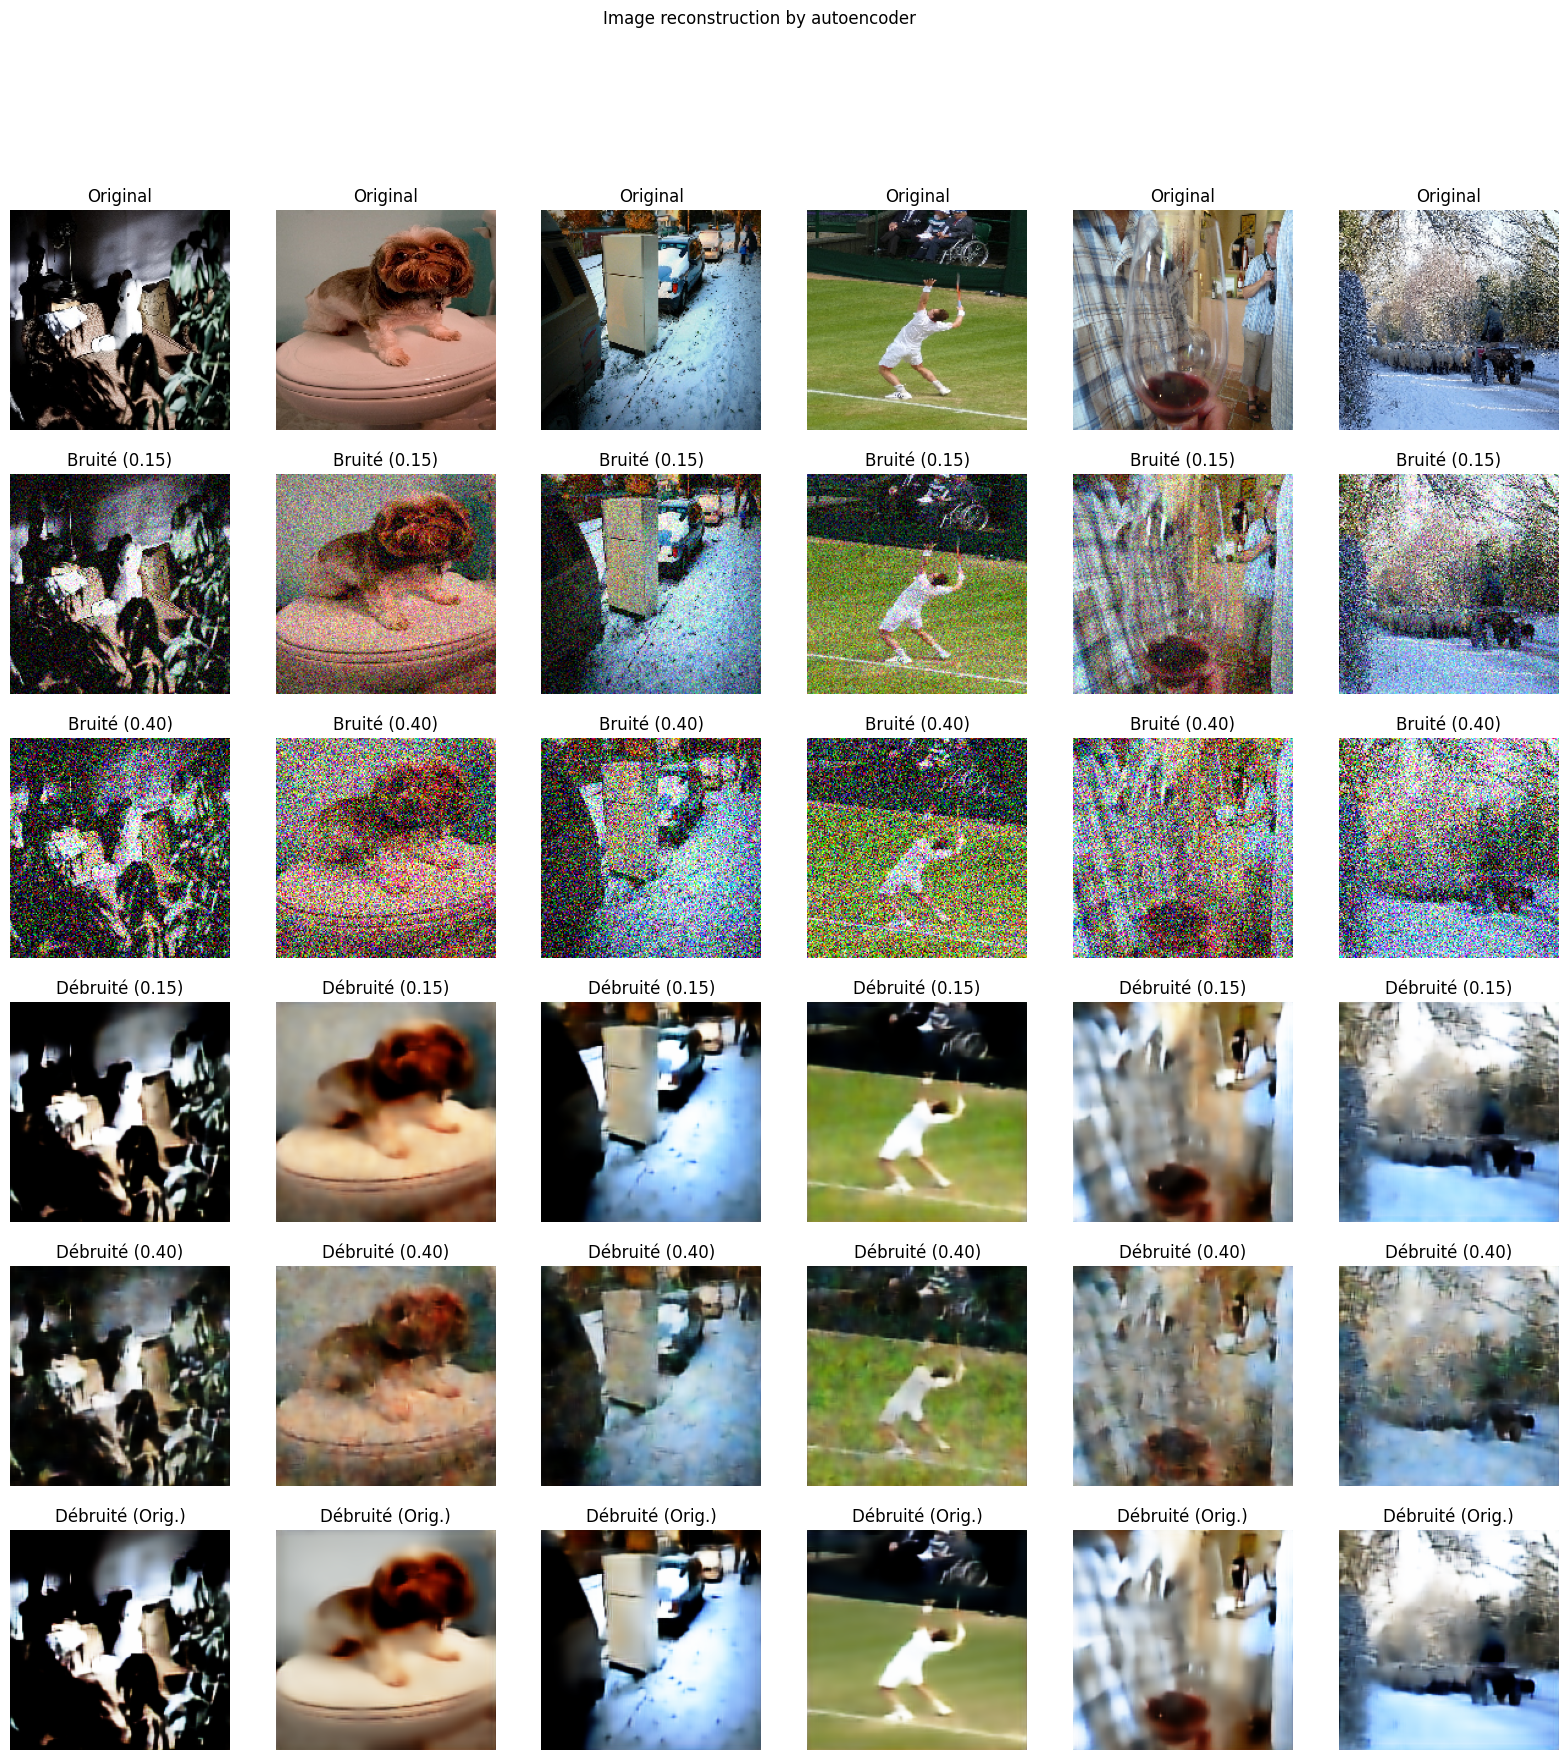

In [27]:
# Affichage des images originales, bruitées et débruitées
plt.figure(figsize=(20,20))
num_images_to_show = 6

for i in range(num_images_to_show):
    # Images originales
    ax = plt.subplot(6, num_images_to_show, i + 1)
    plt.imshow(y_test_015[i].reshape(img_height, img_width, rgb))
    plt.title("Original")
    plt.axis("off")
    
    # Images légèrement bruitées
    ax = plt.subplot(6, num_images_to_show, i + 1 + num_images_to_show)
    plt.imshow(X_test_015[i].reshape(img_height, img_width, rgb))
    plt.title("Bruité (0.15)")
    plt.axis("off")

    # Images fortement bruitées
    ax = plt.subplot(6, num_images_to_show, i + 1 + 2*num_images_to_show)
    plt.imshow(X_test_040[i].reshape(img_height, img_width, rgb))
    plt.title("Bruité (0.40)")
    plt.axis("off")
    
    # Images légèrement bruitées débruitées
    ax = plt.subplot(6, num_images_to_show, i + 1 + 3*num_images_to_show)
    plt.imshow(decoded_imgs_015[i].reshape(img_height, img_width, rgb))
    plt.title("Débruité (0.15)")
    plt.axis("off")

    # Images fortement bruitées débruitées
    ax = plt.subplot(6, num_images_to_show, i + 1 + 4*num_images_to_show)
    plt.imshow(decoded_imgs_040[i].reshape(img_height, img_width, rgb))
    plt.title("Débruité (0.40)")
    plt.axis("off")

    # Images originales débruitées
    ax = plt.subplot(6, num_images_to_show, i + 1 + 5*num_images_to_show)
    plt.imshow(decoded_imgs_0[i].reshape(img_height, img_width, rgb))
    plt.title("Débruité (Orig.)")
    plt.axis("off")

plt.suptitle("Image reconstruction by autoencoder")
plt.show()

# Reconstruction d'Images par l'Autoencodeur

L'image ci-dessus illustre le processus de reconstruction d'images par notre modèle d'autoencodeur. Elle présente une comparaison entre les images originales, les images bruitées à deux niveaux de bruit (0.15 et 0.40), et les images débruitées produites par le modèle.

### Détails des Images :

1. **Images Originales** :
   - La première ligne montre les images originales, qui servent de référence pour évaluer la qualité des reconstructions.

2. **Images Bruitées (0.15)** :
   - La deuxième ligne présente les images légèrement bruitées (niveau de bruit 0.15). Ces images montrent une dégradation modérée de la qualité, avec des détails encore visibles mais altérés par le bruit.

3. **Images Bruitées (0.40)** :
   - La troisième ligne affiche les images fortement bruitées (niveau de bruit 0.40). Ici, le bruit est beaucoup plus prononcé, rendant les détails des images originales difficiles à discerner.

4. **Images Débruitées (0.15)** :
   - La quatrième ligne montre les reconstructions des images légèrement bruitées. Le modèle d'autoencodeur a réussi à récupérer une grande partie des détails, bien que certaines imperfections subsistent.

5. **Images Débruitées (0.40)** :
   - La dernière ligne présente les reconstructions des images fortement bruitées. Malgré le niveau de bruit élevé, le modèle a réussi à extraire des caractéristiques essentielles, montrant une capacité impressionnante à gérer des dégradations sévères.

### Conclusion Générale

Dans ce projet, nous avons développé un modèle d'autoencodeur pour traiter des images bruitées, en utilisant un dataset d'images corrompues par du bruit gaussien à deux niveaux différents : léger (0.15) et fort (0.40). L'objectif principal était d'évaluer la capacité du modèle à reconstruire des images originales à partir de ces données bruitées.

#### Résultats et Évaluation

1. **Performance du Modèle** :
   - Les résultats du PSNR ont montré que le modèle a obtenu un PSNR moyen de 15.83 pour les images légèrement bruitées et de 20.76 pour les images fortement bruitées. Cela indique que le modèle a mieux réussi à reconstruire les images fortement bruitées, ce qui peut être attribué à son entraînement sur des données similaires.
   - Les valeurs du MSE ont également révélé des performances intéressantes, avec un MSE moyen de 0.027 pour les images légèrement bruitées et de 0.010 pour les images fortement bruitées. Ces résultats suggèrent que le modèle a appris à ignorer le bruit et à se concentrer sur les caractéristiques essentielles des images, en particulier dans des conditions de bruit plus élevé.

2. **Visualisation des Résultats** :
   - L'affichage des images originales, bruitées et débruitées a permis d'illustrer visuellement la capacité du modèle à reconstruire les images. Les reconstructions des images fortement bruitées étaient particulièrement impressionnantes, montrant que le modèle a réussi à récupérer des détails significatifs malgré la dégradation.

#### Implications et Perspectives

- Les résultats obtenus soulignent l'efficacité des autoencodeurs pour le débruitage d'images, même dans des conditions de bruit élevé. Cependant, les valeurs de PSNR et de MSE inférieures à des seuils idéaux indiquent qu'il existe encore des marges d'amélioration.
- Pour améliorer la qualité des reconstructions, plusieurs pistes peuvent être explorées :
  - **Optimisation des Hyperparamètres** : Ajuster le nombre d'époques, la taille du lot, et d'autres paramètres d'entraînement pourrait améliorer les performances.
  - **Architectures de Modèles Avancées** : L'utilisation de modèles plus complexes, tels que les réseaux de neurones convolutifs profonds ou les architectures de type U-Net, pourrait permettre de mieux capturer les détails des images.
  - **Techniques d'Ajustement des Données** : L'augmentation des données et d'autres techniques de prétraitement pourraient également contribuer à améliorer la robustesse du modèle.

#### Conclusion Finale

En somme, ce projet a démontré la capacité des autoencodeurs à traiter et à reconstruire des images bruitées, avec des résultats encourageants. Les analyses effectuées, tant quantitatives que qualitatives, fournissent des bases solides pour des travaux futurs dans le domaine du débruitage d'images et de l'apprentissage profond. L'exploration de nouvelles architectures et techniques d'entraînement pourrait ouvrir la voie à des améliorations significatives dans la qualité des reconstructions d'images.